In [ ]:
# Data Preprocessing

In [97]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [98]:
# Importing the dataset
df = pd.read_csv('flats.csv', sep=';')

In [3]:
df

,rooms,location,condition,m2,type,price
0,2.0,suburbs,repaired,50,used,35000
1,1.0,center,repaired,37,used,35000
2,3.0,suburbs,repaired,67,used,65000
3,NaN,suburbs,repaired,21,used,15000
4,1.0,suburbs,repaired,82,NaN,60000
...,...,...,...,...,...,...
212,2.0,center,unrepaireded,65,new,46407
213,3.0,center,unrepaireded,84,new,57678
214,3.0,center,unrepaireded,93,new,63513
215,2.0,center,unrepaireded,72,new,51121


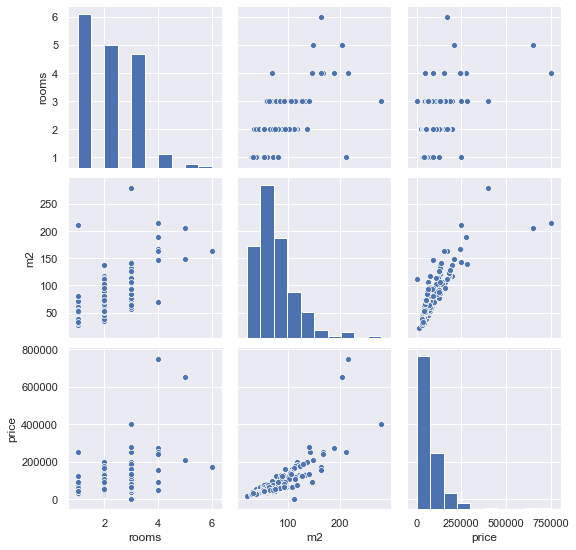

In [99]:
# Features distribution
import seaborn as sns
sns.set()
sns.pairplot(df, size = 2.5)
plt.show();

In [100]:
df.describe()

,rooms,m2,price
count,216.000000,217.000000,217.000000
mean,2.013889,76.331797,82427.451613
std,0.971593,38.019982,82183.660820
min,1.000000,21.000000,1.000000
25%,1.000000,49.000000,39429.000000
50%,2.000000,67.000000,59548.000000
75%,3.000000,91.000000,90000.000000
max,6.000000,280.000000,750000.000000


In [116]:
def outliers(df):
    num_var = list(df._get_numeric_data().columns)
    for col_names in num_var:
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()-3*df[col_names].std() 
                            if y < df[col_names].mean()-3*df[col_names].std() else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()+3*df[col_names].std() 
                            if y > df[col_names].mean()+3*df[col_names].std() else y)
    return(df)

In [117]:
# Outliers
df = outliers(df)
df.describe()

,rooms,m2,price
count,216.000000,217.000000,217.000000
mean,2.008269,75.638557,78680.609688
std,0.951661,35.256700,59689.357661
min,1.000000,21.000000,1.000000
25%,1.000000,49.000000,39429.000000
50%,2.000000,67.000000,59548.000000
75%,3.000000,91.000000,90000.000000
max,4.928667,190.391743,328978.434073


In [19]:
df.dtypes

rooms        float64
location      object
condition     object
m2           float64
type          object
price        float64
dtype: object

In [17]:
# Cheking Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
type,1,0.004608
rooms,1,0.004608
price,0,0.000000
m2,0,0.000000
condition,0,0.000000
location,0,0.000000


In [18]:
# Taking care of missing data (numeric)
def fill_missing(x):
    num_var = list(x._get_numeric_data().columns)
    for col_names in num_var:        
        prep_med = SimpleImputer(missing_values=np.nan, strategy='mean')
        prep_med.fit(x[num_var])
        x[num_var] = prep_med.transform(x[num_var])
    return(x)
from sklearn.impute import SimpleImputer

df = fill_missing(df)

In [19]:
# Taking care of missing data (non-numeric)
def fill_missing_char(x):
    num_var = list(set(df.columns) - set(x._get_numeric_data().columns))
    for col_names in num_var:        
        prep_med = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        prep_med.fit(x[num_var])
        x[num_var] = prep_med.transform(x[num_var])
    return(x)
from sklearn.impute import SimpleImputer
df = fill_missing_char(df)

In [20]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
price,0,0.0
type,0,0.0
m2,0,0.0
condition,0,0.0
location,0,0.0
rooms,0,0.0


In [21]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
df[['location']] = LabelEncoder().fit_transform(df[['location']])
df[['condition']] = LabelEncoder().fit_transform(df[['condition']])
df[['type']] = LabelEncoder().fit_transform(df[['type']])

C:\Users\kater\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
df

,rooms,location,condition,m2,type,price
0,2.0,1,0,50,1,35000
1,1.0,0,0,37,1,35000
2,3.0,1,0,67,1,65000
3,2.0,1,0,21,1,15000
4,1.0,1,0,82,0,60000
...,...,...,...,...,...,...
212,2.0,0,1,65,0,46407
213,3.0,0,1,84,0,57678
214,3.0,0,1,93,0,63513
215,2.0,0,1,72,0,51121


In [11]:
# Descriptive Statistics
df.describe()

,rooms,location,condition,m2,type,price
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000
mean,2.013825,0.267281,0.774194,76.331797,0.202765,82427.451613
std,0.969341,0.443564,0.419079,38.019982,0.402988,82183.660820
min,1.000000,0.000000,0.000000,21.000000,0.000000,1.000000
25%,1.000000,0.000000,1.000000,49.000000,0.000000,39429.000000
50%,2.000000,0.000000,1.000000,67.000000,0.000000,59548.000000
75%,3.000000,1.000000,1.000000,91.000000,0.000000,90000.000000
max,6.000000,1.000000,1.000000,280.000000,1.000000,750000.000000


In [59]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, :-1].values
y = df.iloc[:, 5].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [60]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler().fit(np.array([[i] for i in y_train]))
y_train = sc_y.transform(np.array([[i] for i in y_train]))
y_test = sc_y.transform(np.array([[i] for i in y_test]))